In [1]:
import numpy as np
from numpy import *
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import torch
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing

In [2]:
def sigmoid(inX):
    return 1.0 / (1 + exp(-inX))


In [3]:
class PointDataset(Dataset):
    def __init__(self):
        scaler = StandardScaler()
        # scaler = preprocessing.MinMaxScaler()
        self.frame = pd.read_csv('./data/trainSet.csv')
        self.frame.insert(0, 'constant', 1)
        self.labels = self.frame.label
        # print(self.labels)
        self.frame = self.frame.drop(columns=['label'])
        self.frame = scaler.fit_transform(self.frame.astype(float))
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        # print(self.frame.loc[idx,:])
        #x = torch.Tensor(np.array([self.frame.loc[idx,:]])).reshape(33)
        x = torch.Tensor(self.frame[idx]).reshape(33)
        y = torch.Tensor(np.array([self.labels[idx]])).reshape(1)
        sample = {'features':x,'labels':y}
        return sample

In [4]:
def test(weight):
    scaler = StandardScaler()
    train = pd.read_csv('./data/trainSet.csv')
    train.insert(0, 'constant', 1)
    labels = np.array(train.label).reshape(200000)
    features = train.drop(columns=['label'])
    features = scaler.fit_transform(features.astype(float))
    features = np.array(features)
    acc = 0
    test = []
    weight = np.array(weight).reshape(33)
    for i in range(200000):
        t = sigmoid(np.sum(np.dot(weight,features[i])))
        if t >= 0.5:
            test.append(1)
        else:
            test.append(0)
    for i in range(200000):
        if test[i] == labels[i]:
            acc += 1
    return acc/len(labels)

In [5]:
def show_plot(y, title, x_l, y_l):
    x = np.array(range(len(y)))
    y = np.array(y)
    plt.plot(x, y, c='b')
    plt.axis()
    plt.title(title)
    plt.xlabel(x_l)
    plt.ylabel(y_l)
    plt.show()

In [6]:
def write(weight):
    scaler = StandardScaler()
    train_data = pd.read_csv('./data/trainSet.csv')
    test_data = pd.read_csv('./data/test set.csv')
    temp = train_data.drop(labels='label', axis=1)
    temp = pd.concat([temp, test_data])
    temp.insert(0, 'constant', 1)
    temp = scaler.fit_transform(temp.astype(float))
    test = temp[200000:]
    test = np.array(test)
    weight = np.array(weight).reshape(33)
    result = []
    for i in range(len(test)):
        t = sigmoid(np.sum(np.dot(weight,test[i])))
        if t >= 0.5:
            result.append(1)
        else:
            result.append(0)
    df = pd.DataFrame({'Predicted':result})
    df.index += 1
    df.to_csv('./data/sub.csv', index = True, index_label = 'id')

In [7]:
def train(trainloader, epoches, base, bitch_size):
    weight = np.random.random((33,1))
    acc = []
    err = []
    for i in range(epoches):
        print('epoche', i)
        lr = 1/(base*(i*i + 1))
        for j, data in enumerate(trainloader):
            features = np.array(data['features'])
            label = np.array(data['labels'])
            #print(label.shape)
            output = sigmoid(np.dot(features,weight))
            error = label - output
            weight = weight + lr*np.dot(features.T,error)/len(features)
        if i%50 == 0:
            acc_v = test(weight)
            print(acc_v)
            acc.append(acc_v)
            j = (label * np.log(output) + ([1] - label) * np.log([1] - output)).sum()/(0-bitch_size)
            err.append(j)
    return weight, acc, err
     

In [10]:
bitch_size = 32
epoches = 200
base = 100
trainset = PointDataset()
trainloader = DataLoader(dataset=trainset,batch_size=bitch_size)
weight, acc, error = train(trainloader, epoches, base, bitch_size)

epoche 0
0.60053
epoche 1
epoche 2
epoche 3
epoche 4
epoche 5
epoche 6
epoche 7
epoche 8
epoche 9
epoche 10
epoche 11
epoche 12
epoche 13
epoche 14
epoche 15
epoche 16
epoche 17
epoche 18
epoche 19
epoche 20
epoche 21
epoche 22
epoche 23
epoche 24
epoche 25
epoche 26
epoche 27
epoche 28
epoche 29
epoche 30
epoche 31
epoche 32
epoche 33
epoche 34
epoche 35
epoche 36
epoche 37
epoche 38
epoche 39
epoche 40
epoche 41
epoche 42
epoche 43
epoche 44
epoche 45
epoche 46
epoche 47
epoche 48
epoche 49
epoche 50
0.605275
epoche 51
epoche 52
epoche 53
epoche 54
epoche 55
epoche 56
epoche 57
epoche 58
epoche 59
epoche 60
epoche 61
epoche 62
epoche 63
epoche 64
epoche 65
epoche 66
epoche 67
epoche 68
epoche 69
epoche 70
epoche 71
epoche 72
epoche 73
epoche 74
epoche 75
epoche 76
epoche 77
epoche 78
epoche 79
epoche 80
epoche 81
epoche 82
epoche 83
epoche 84
epoche 85
epoche 86
epoche 87
epoche 88
epoche 89
epoche 90
epoche 91
epoche 92
epoche 93
epoche 94
epoche 95
epoche 96
epoche 97
epoche 98
epo

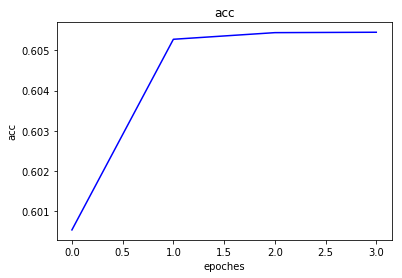

In [11]:
show_plot(acc, 'acc', 'epoches', 'acc')

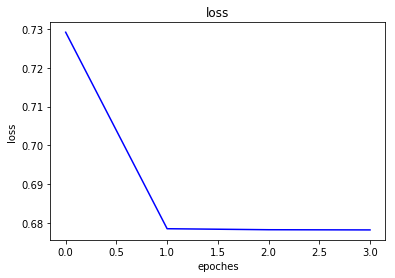

In [12]:
show_plot(error, 'loss', 'epoches', 'loss')

In [13]:
write(weight)

In [14]:
weight

array([[ 9.96562409e-01],
       [-3.07478184e-01],
       [ 1.40554762e-01],
       [ 3.35461031e-02],
       [ 1.69994934e-02],
       [ 8.03732822e-03],
       [-1.13555395e-02],
       [ 3.07158510e-02],
       [ 7.47785157e-03],
       [-3.97958332e-03],
       [ 3.39304679e-01],
       [-8.01907766e-02],
       [ 2.24395575e-03],
       [-3.62296776e-02],
       [-2.91569453e-01],
       [-2.43924231e-01],
       [ 1.43951922e-01],
       [ 2.56924246e-01],
       [ 6.66415372e-02],
       [-1.96341018e-01],
       [ 3.94935010e-01],
       [-2.58999620e-02],
       [ 6.37322751e-02],
       [ 4.02855305e-02],
       [-3.99387086e-01],
       [ 3.84485515e-01],
       [-1.95239205e-04],
       [-4.59093912e-02],
       [-3.15481626e-03],
       [-2.06269791e-01],
       [ 1.34130126e-01],
       [-6.64829543e-02],
       [ 4.28540439e-01]])

In [18]:
def train(trainloader, epoches, base, bitch_size):
    weight = np.array([[ 9.96562409e-01],
       [-3.07478184e-01],
       [ 1.40554762e-01],
       [ 3.35461031e-02],
       [ 1.69994934e-02],
       [ 8.03732822e-03],
       [-1.13555395e-02],
       [ 3.07158510e-02],
       [ 7.47785157e-03],
       [-3.97958332e-03],
       [ 3.39304679e-01],
       [-8.01907766e-02],
       [ 2.24395575e-03],
       [-3.62296776e-02],
       [-2.91569453e-01],
       [-2.43924231e-01],
       [ 1.43951922e-01],
       [ 2.56924246e-01],
       [ 6.66415372e-02],
       [-1.96341018e-01],
       [ 3.94935010e-01],
       [-2.58999620e-02],
       [ 6.37322751e-02],
       [ 4.02855305e-02],
       [-3.99387086e-01],
       [ 3.84485515e-01],
       [-1.95239205e-04],
       [-4.59093912e-02],
       [-3.15481626e-03],
       [-2.06269791e-01],
       [ 1.34130126e-01],
       [-6.64829543e-02],
       [ 4.28540439e-01]])
    acc = []
    err = []
    for i in range(epoches):
        print('epoche', i)
        lr = 1/(base*(i*i + 1))
        for j, data in enumerate(trainloader):
            features = np.array(data['features'])
            label = np.array(data['labels'])
            #print(label.shape)
            output = sigmoid(np.dot(features,weight))
            error = label - output
            weight = weight + lr*np.dot(features.T,error)/len(features)
        if i%2 == 0:
            acc_v = test(weight)
            print(acc_v)
            acc.append(acc_v)
            j = (label * np.log(output) + ([1] - label) * np.log([1] - output)).sum()/(0-bitch_size)
            err.append(j)
    return weight, acc, err

In [ ]:
bitch_size = 20000
epoches = 50
base = 10000000
trainset = PointDataset()
trainloader = DataLoader(dataset=trainset,batch_size=bitch_size)
weight, acc, error = train(trainloader, epoches, base, bitch_size)

epoche 0
0.60544
epoche 1
epoche 2
0.60544
epoche 3
epoche 4
0.60544
epoche 5
